In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import graphviz
import pydot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
tf.__version__

'2.0.0-alpha0'

In [74]:
def read(file):
    return pd.read_csv(file)

#features.set_index(['Index'], inplace = True)
#features.drop(columns = ['Index'], inplace = True)

features = read('unique_best_features.csv')
features.head(5)

,n [count],H [mm],b [mm],d [mm],γ [N/mm3],Pmax [N],P0 [N]
0,3,90.0,19.4114,5.0,0.000016,9.080644,0.046939
1,3,90.0,12.9410,5.0,0.000016,8.758713,0.154249
2,6,90.0,19.4114,5.0,0.000016,11.753734,0.720029
3,6,90.0,12.9410,5.0,0.000016,10.797683,1.032218
4,F,90.0,19.4114,5.0,0.000016,14.095079,2.017568


In [75]:
def print_shape(data):
    print("The shape of our feature is " + str(data.shape))

print_shape(features)

# Calculate the threshold
np_array = np.array(features)
print(np_array)
np_array = np_array[:,5]
threshold = np.mean(np_array)
print(threshold)
#print(np_array)

The shape of our feature is (177, 7)
[['3' 90.0 19.4114 ... 1.6227528090000002e-05 9.080643766215946
  0.04693902477297509]
 ['3' 90.0 12.941 ... 1.6227528090000002e-05 8.758712685220129
  0.15424938510491631]
 ['6' 90.0 19.4114 ... 1.6227528090000002e-05 11.753734108513036
  0.7200287064686859]
 ...
 ['6' 180.0 50.0 ... 1.6750322160000002e-05 61.59000337612501
  5.760664511594999]
 ['3' 180.0 50.0 ... 1.6750322160000002e-05 54.62917554023999
  15.073036600167]
 ['6' 180.0 50.0 ... 1.6750322160000002e-05 67.66697353814999
  7.2759821856050015]]
24.824067298221145


In [76]:
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181

In [77]:
features = pd.get_dummies(features, columns = ['n [count]'])
#sc = StandardScaler()
#sc.fit(features)
#features = sc.transform(features)
#features = np.array(features)
#target pmax
pmax = np.array(features['Pmax [N]'])

#Remove labels from the features
features = features.drop('Pmax [N]', axis = 1)

#features = StandardScaler().fit_transform(features)

#pca = PCA(n_components = 11)
#principalComponents = pca.fit_transform(features)
#features = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
#display(features)
#print(pca.explained_variance_ratio_.cumsum())
features = np.array(features)
#Covert to numpy arrays
#features = np.array(features)
print(features)

print_shape(features)

[[ 90.      19.4114   5.     ...   0.       0.       0.    ]
 [ 90.      12.941    5.     ...   0.       0.       0.    ]
 [ 90.      19.4114   5.     ...   1.       0.       0.    ]
 ...
 [180.      50.      10.     ...   1.       0.       0.    ]
 [180.      50.      10.     ...   0.       0.       0.    ]
 [180.      50.      10.     ...   1.       0.       0.    ]]
The shape of our feature is (177, 11)


In [78]:
#split the data into training set and testing set 
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [79]:
#Scaling the training set and the testing set
sc = StandardScaler()
sc.fit(train_features)

x_train = sc.transform(train_features)
x_test = sc.transform(test_features)

sc1 = StandardScaler()
sc1.fit(train_labels.reshape(-1,1))
train_labels = sc1.transform(train_labels.reshape(-1,1)).reshape(-1,1)
test_labels = sc1.transform(test_labels.reshape(-1,1)).reshape(-1,1)


#print(test_labels)


#Adding bias

x_train_std = np.insert(x_train, 0, 1, axis = 1)
x_test_std = np.insert(x_test, 0, 1, axis = 1)

print(x_train_std)
print(x_test_std)

#for i in range(test_labels.shape[0]):#
#    if test_labels[i] > threshold:
#        test_labels[i] = 1
#    else:
#        test_labels[i] = -1
#print(test_labels)

#for i in range(train_labels.shape[0]):
#    if train_labels[i] > threshold:
#        train_labels[i] = 1
#    else:
#        train_labels[i] = -1
#print(train_labels)





[[ 1.         -0.61998584 -1.07247588 ...  1.36732045 -0.12403473
  -0.58901509]
 [ 1.         -0.61998584 -0.50599299 ... -0.73135745 -0.12403473
   1.69774938]
 [ 1.         -0.61998584 -0.50599299 ... -0.73135745 -0.12403473
  -0.58901509]
 ...
 [ 1.         -0.61998584  0.76105709 ...  1.36732045 -0.12403473
  -0.58901509]
 [ 1.          1.74832019  1.39458212 ...  1.36732045 -0.12403473
  -0.58901509]
 [ 1.          0.43259462 -0.50599299 ... -0.73135745 -0.12403473
  -0.58901509]]
[[ 1.00000000e+00 -6.19985838e-01 -5.05992993e-01 -4.26719524e-01
   3.00832247e-01 -2.83855636e-01 -8.73704057e-02 -1.52498570e-01
  -7.31357451e-01 -7.31357451e-01  8.06225775e+00 -5.89015089e-01]
 [ 1.00000000e+00 -6.19985838e-01 -5.05992993e-01 -4.26719524e-01
   3.00832247e-01 -5.70177201e-01 -8.73704057e-02  6.55743852e+00
  -7.31357451e-01 -7.31357451e-01 -1.24034735e-01 -5.89015089e-01]
 [ 1.00000000e+00 -6.19985838e-01 -5.05992993e-01 -4.26719524e-01
  -1.83463433e+00 -3.56703757e-01 -8.7370405

In [80]:
#Creating Neural network model
model = tf.keras.models.Sequential()

#input layer
model.add(tf.keras.layers.Flatten())
#Hidden layers
model.add(tf.keras.layers.Dense(6, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(4, activation = tf.nn.relu))

#Output layer
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))



In [81]:
#Train
model.compile(optimizer = 'sgd', loss= tf.keras.losses.MeanSquaredError(), metrics = ['accuracy'])

history = model.fit(x_train_std, train_labels, epochs = 1500, validation_data = (x_test_std, test_labels))

Train on 132 samples, validate on 45 samples
Epoch 1/1500
132/132 [==============================] - 0s 1ms/sample - loss: 1.2212 - accuracy: 0.0000e+00 - val_loss: 0.8951 - val_accuracy: 0.0000e+00
Epoch 2/1500
132/132 [==============================] - 0s 56us/sample - loss: 1.2193 - accuracy: 0.0000e+00 - val_loss: 0.8943 - val_accuracy: 0.0000e+00
Epoch 3/1500
132/132 [==============================] - 0s 72us/sample - loss: 1.2181 - accuracy: 0.0000e+00 - val_loss: 0.8934 - val_accuracy: 0.0000e+00
Epoch 4/1500
132/132 [==============================] - 0s 56us/sample - loss: 1.2169 - accuracy: 0.0000e+00 - val_loss: 0.8926 - val_accuracy: 0.0000e+00
Epoch 5/1500
132/132 [==============================] - 0s 52us/sample - loss: 1.2156 - accuracy: 0.0000e+00 - val_loss: 0.8917 - val_accuracy: 0.0000e+00
Epoch 6/1500
132/132 [==============================] - 0s 63us/sample - loss: 1.2144 - accuracy: 0.0000e+00 - val_loss: 0.8908 - val_accuracy: 0.0000e+00
Epoch 7/1500
132/132 [====

In [82]:
val_loss, val_acc = model.evaluate(x_test_std, test_labels )

45/45 [==============================] - 0s 79us/sample - loss: 0.3078 - accuracy: 0.0000e+00


In [83]:
errors = np.sqrt(val_loss * 2)
mape = 100 * (errors / np.sum(test_labels **2))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.75 %.


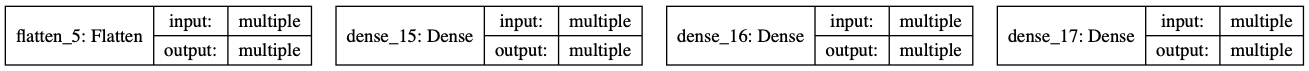

In [84]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)


In [85]:
predictions = model.predict(
    x_test_std,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    use_multiprocessing=False
)

print(predictions)
print(test_labels)

[[1.6338947e-01]
 [1.1464712e-01]
 [9.0251267e-03]
 [4.8359239e-01]
 [3.6650896e-04]
 [4.7271818e-02]
 [8.6289644e-03]
 [9.8527682e-01]
 [9.9259615e-03]
 [1.6205639e-02]
 [7.3746055e-02]
 [4.2270929e-02]
 [1.7636135e-01]
 [9.7394884e-03]
 [9.6417367e-03]
 [1.8759251e-02]
 [7.8962743e-03]
 [4.6364546e-02]
 [9.1269314e-03]
 [5.0961614e-01]
 [7.4333757e-01]
 [3.7315488e-02]
 [1.1327645e-01]
 [9.2846584e-01]
 [9.8979539e-01]
 [7.6981783e-03]
 [8.9417928e-01]
 [1.6806346e-01]
 [9.8558867e-01]
 [9.2578828e-03]
 [5.4809034e-02]
 [7.9876482e-03]
 [5.1580697e-02]
 [1.9265711e-03]
 [4.5258793e-01]
 [4.1307837e-02]
 [5.3865403e-01]
 [9.9890828e-03]
 [8.6319447e-03]
 [1.1567360e-01]
 [7.1701878e-01]
 [8.4500127e-03]
 [4.9972895e-01]
 [1.3036131e-03]
 [3.5446236e-01]]
[[-4.21069585e-01]
 [-7.04525102e-01]
 [-7.45253018e-01]
 [ 8.08563341e-01]
 [-9.15083529e-01]
 [ 4.91843186e-02]
 [-8.26206425e-01]
 [ 1.26073778e+00]
 [-8.29705798e-01]
 [-5.68081991e-01]
 [-4.93808629e-01]
 [-2.44667035e-01]
 [-1.6

In [86]:
a = np.array(predictions)
error = 0
for i in range(45):
    error += np.abs(test_labels[i] - a[i][0])
# Calculate mean absolute percentage error
mape = 100 * (error / np.sum(test_labels **2))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', accuracy, '%.')

 

Accuracy: 10.79954866113205 %.


In [87]:
from nnv import NNV

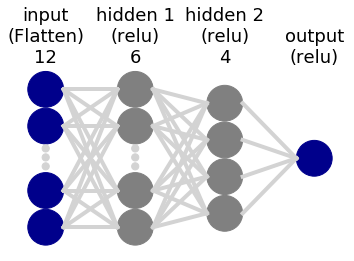

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1211d8f98>)

In [88]:
layersList = [
    {"title":"input\n(Flatten)\n12", "units": 12, "color": "darkBlue"},
    {"title":"hidden 1\n(relu)\n6", "units": 6},
    {"title":"hidden 2\n(relu)\n4", "units": 4},
    {"title":"output\n(relu)", "units": 1,"color": "darkBlue"},
]

NNV(layersList).render(save_to_file="my_example.png")

In [89]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

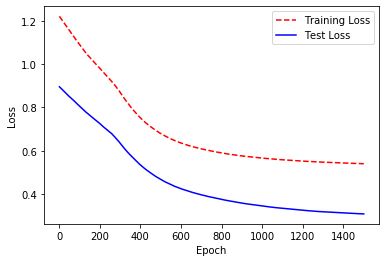

In [90]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
fig = plt.show();
plt.savefig('neural_network.png')
plt.close(fig)